<a href="https://colab.research.google.com/github/Nayeong127/class2021Spring/blob/main/0526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# Phasor

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [ ]:
# generate phase
theta = t * 2*np.pi * freq   

In [ ]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

NameError: ignored

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, 'imag')

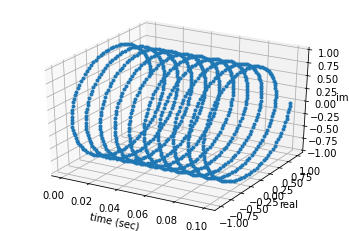

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

In [31]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

# Generate pulse train (=source)

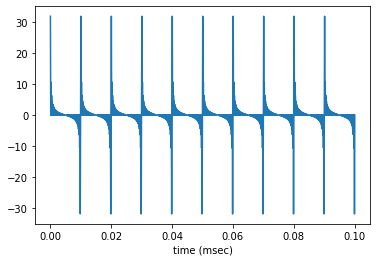

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

# Filter source

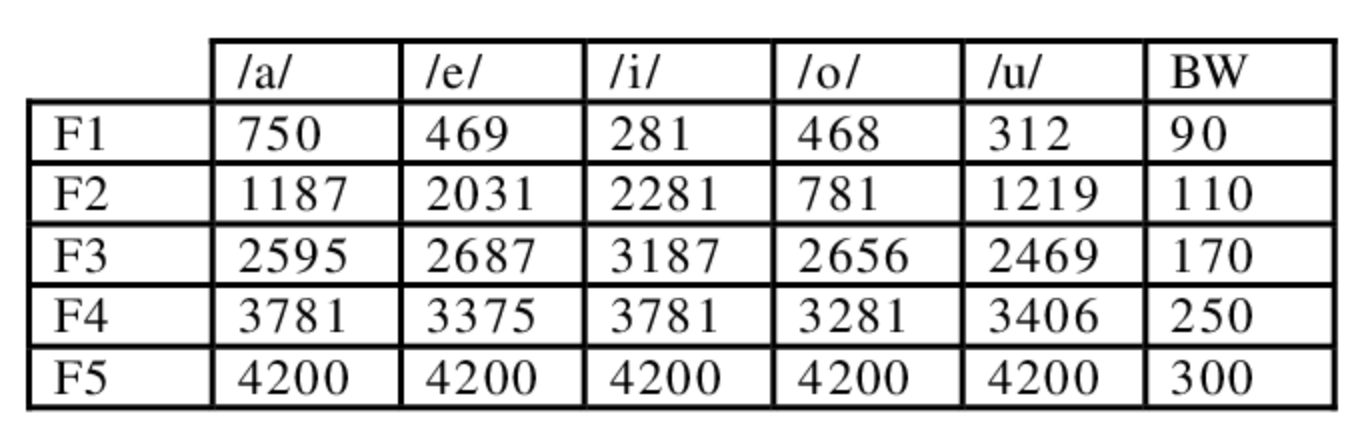

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
s = s_all

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

이거 했음~

In [1]:
from google.colab import files #컴에 있는 파일을 콜랩에 업로드~
#!rm *.wav
tmp = files.upload() # 이거 하면 파일 선택~ 떠서 a.wav 업로드~
#fn = list(tmp)[0]

Saving a.wav to a.wav


In [6]:
from google.colab import files 
!rm *.wav #rm: remove. *.wav는 저런 이름 갖고 있는 거 다 없애~ 이거 안 하고 한 번 더 하면 (1) 같은 게 뜨거든 그래서 콜랩에 있는 wav 파일을 지워야 함!!
tmp = files.upload() 
#fn = list(tmp)[0]

Saving a.wav to a.wav


In [8]:
type(tmp) 

dict

In [11]:
tmp # 뒤에는 wav 파일에 대한 정보 쭉 들어있는 거야 이건 중요하지 않고 파일 네임을 쓰기 위해 한 거임!

{'a.wav': b'RIFFH"\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x10\'\x00\x00 N\x00\x00\x02\x00\x10\x00data$"\x00\x00#\xfb\xa5\xf8\x89\xf9\n\xfae\xfb\x1a\xfc\x9f\xfb\x0c\xfb\xef\xfa\x03\xfb\xa3\xfb)\xfc\xb3\xfcA\xfc\x80\xfb:\xfb\xc8\xfbN\xfcy\xfd\x0b\xfdu\xfc.\xfb\xd9\xf9@\xf9X\xfc\x90\x05\xf0\x118\x19V\x1a\xf9\x13\x87\x06T\xf9\x96\xf2\xb1\xf4\x84\xfe\xb7\t?\x13\x9b\x18P\x15\xa6\r\xf7\x06-\x03\x8e\x01\x13\x01W\x00\xb3\x00a\xff\xab\xfd\xd0\xff\x9d\x04\x19\t\xac\x0b"\x0b\xa5\x08\xa2\x03\xe2\xfc/\xfaC\xfb=\xfe\xf1\x01\xa9\x05\xbb\x06\x8c\x05\x06\x02\xf5\xfe\xa9\xfd\xb5\xfdA\xfd\xa7\xfds\xfd\xc0\xfb4\xfa\xc2\xf9\xcb\xfa\xce\xfd\xcb\xfe\\\xff\x87\xff>\xfd\xd8\xfa\x05\xfa:\xfa\xe1\xfb\x0c\xfe\x92\xfe[\xffo\xfe\xde\xfcK\xfd\x95\xfe\xff\xff\xe3\x00\x18\x00\x14\xfe}\xfb\xd8\xf8\x9e\xf8\x05\xfb~\xfd\x96\xff\xf0\xff\x8e\xfe\x1a\xfc0\xf9\xc6\xf7\xf6\xf8f\xfb-\xfdH\xfe\x85\xfd\x7f\xfb\x81\xf9\xe6\xf8\xc5\xf9\xf7\xfb\x8a\xfd\xe7\xfe\xd1\xfe.\xfd\xea\xfa\xa4\xfaN\xfb\x82\xfc=\xfd\xd3\xfcA\xfc\x06\

In [13]:
list(tmp) #dict로 쓰기 싫어서 이렇게 할거야. 이게 마지막 줄에 해당하는 거!

['a.wav']

In [14]:
from google.colab import files 
!rm *.wav
tmp = files.upload() 
fn = list(tmp)[0]

Saving a.wav to a.wav


In [15]:
fn

'a.wav'

In [18]:
from scipy.io import wavfile #방금 한 거 불러오기 위해 
sr, s = wavfile.read(fn) #이 함수로 wavfile 불러오고 sr,s 지정
#뒤에 지우고 실행해보면

In [20]:
sr

10000

In [21]:
s

array([-1245, -1883, -1655, ...,  1485,   697,   -65], dtype=int16)

In [22]:
from scipy.io import wavfile  
sr, s = wavfile.read(fn) 
nSamp = len(s) #얜 s의 크기/길이->4370개
dur = nSamp / sr #1초에 10000의 sr, 10000에 비해 4370이면 0.437초->그것이 총 duration
t = np.linspace(1/sr, dur, nSamp) #linspace(만분의 일,0.437, 4370)는 처음 수부터 두번째 수까지 몇 등분 해라~

In [24]:
t #첫 숫자 만 분의 일, 마지막 0.437, 총 4370개

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.368e-01, 4.369e-01,
       4.370e-01])

In [26]:
len(t)

4370

In [28]:
ipd.Audio(s, rate=sr) #시그널, sr 넣어주면 소리 들을 수 있음!

Text(0, 0.5, 'amplitude')

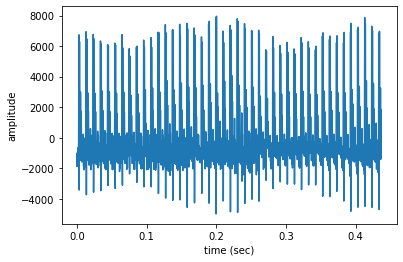

In [29]:
#플랏해볼겡
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s) #얘가 핵심 x,y축!!1
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')

프랏에서 '아'파일 불러오면
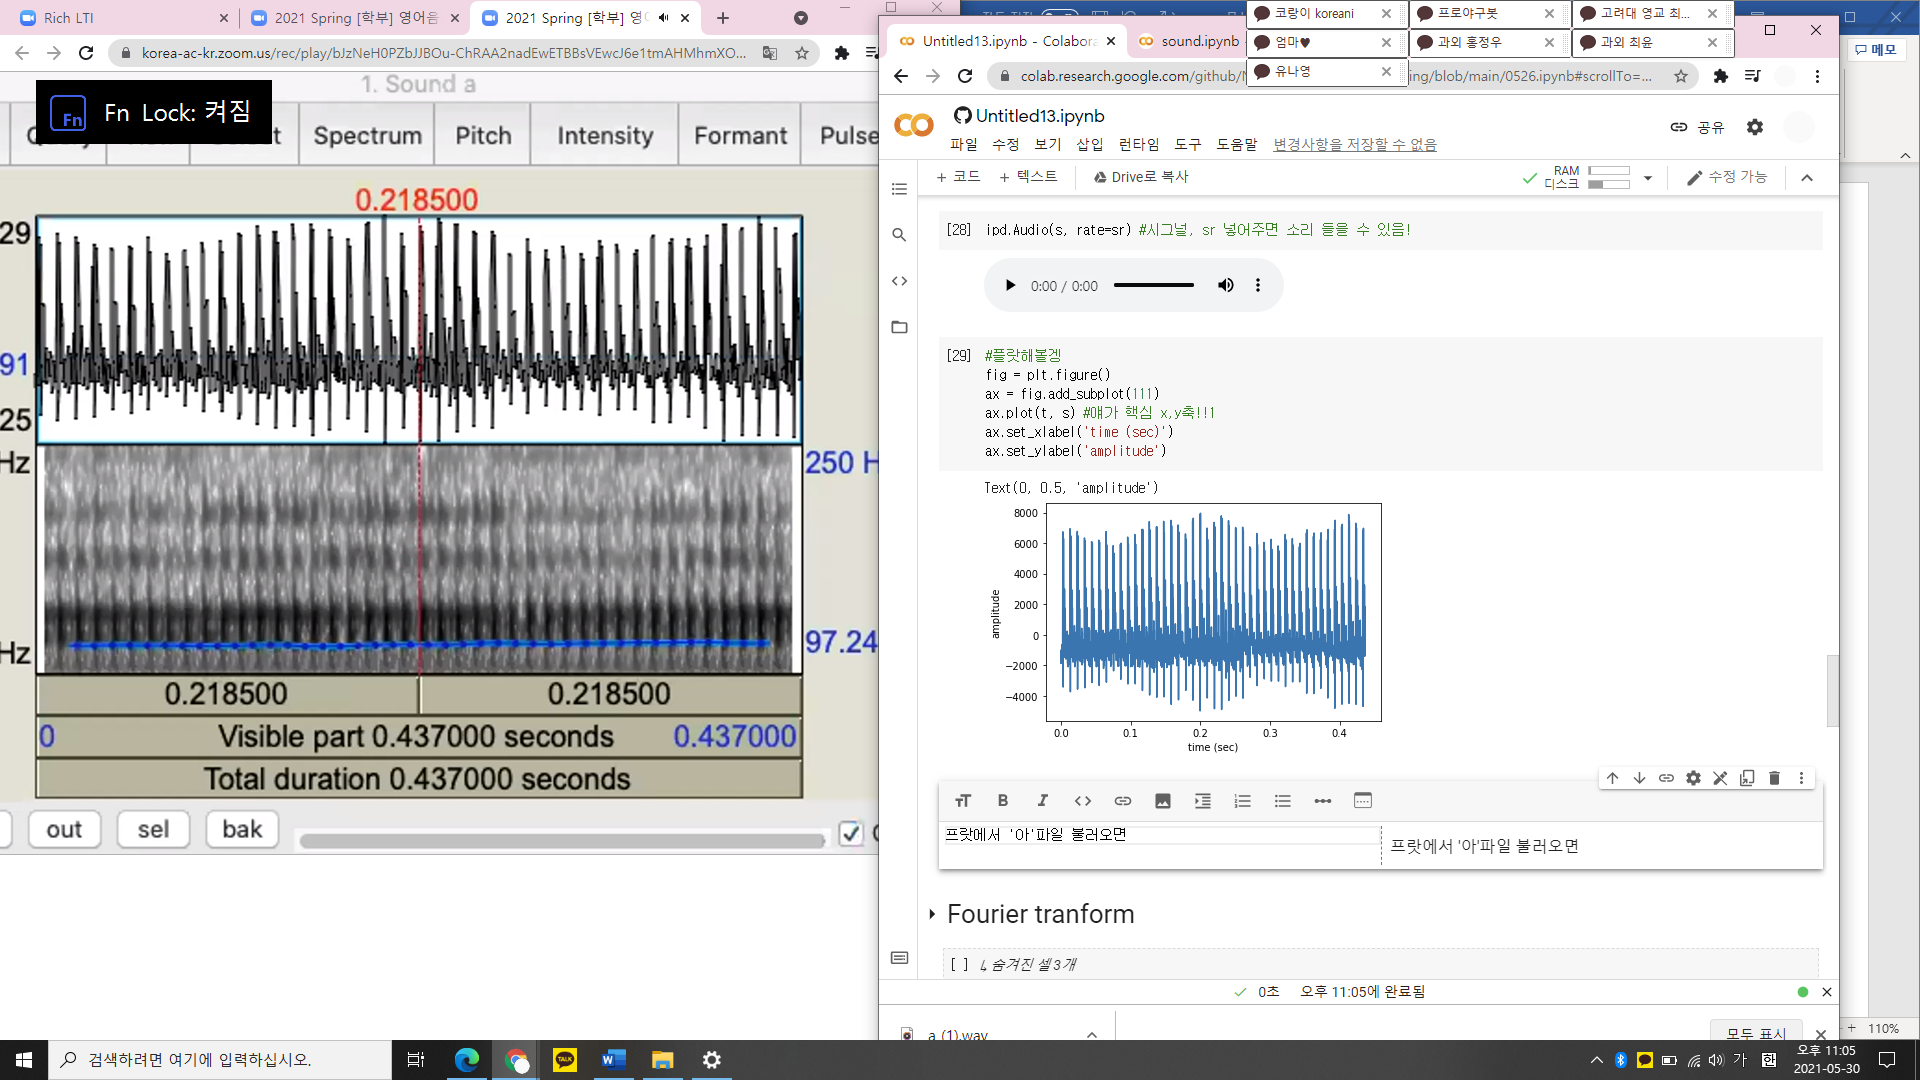

위에 waveform, 아래 스펙토그램
우리가 만든 거랑 프랏이랑 똑같죠!

# Fourier tranform

In [ ]:
# ignore this!!!
# 
# nFFT = nSamp
# amp = [];
# for n in range(0,nFFT):
#     omega = 2*np.pi*n/nFFT # angular velocity
#     z = np.exp(omega*1j)**(np.arange(0,nSamp))
#     amp.append(np.abs(np.dot(s,z)))

In [32]:
nFFT = 512 #일반적으로 많이 쓰는 숫자~
freq = [];
amp = [];
for n in range(1,nFFT+1): 
    freq.append(sr*n/nFFT)
    c, t, theta = phasor_complex(1, sr, dur, freq[-1]) #phasor_complex이 부분이 핵심. #컴플렉스 페이저 만드는 거.입력은 amp,sr,dur,freq인데 출력은 컴플렉스값(복소수-실수부:코싸인값, 허수부:싸인값), 타임, 각도값
    amp.append(np.abs(np.dot(s,c)))

위에꺼. 
싸인웨이브는 하면 안 된다 했으니 저걸로 할거야

512개의 다양한 freq 만들거임. 고주파부터 저주파~

최고주파: sr. 최저주파:sr/512

루프 돌 떄마다 n이 1부터 512까지. freq.append(sr*n/nFFT)얜 512분의 1곱sr,2,... 512/512곱 sr니까 sr, 맨 앞은 512분의1 곱sr-> 총 512개 만들어짐. 



freq[-1]는 the most recently appended one!

 amp.append(np.abs(np.dot(s,c))) -> abs는 절대값, dot은 닷  프로덕트, c는 컴플렉스값, s는 위에서 로드한 저거 

 두 개 닷프로덕트 하면 값 하나 나옴. 이때 중요한 거 둘의 닷프 하려면 길이 똑같아야 함!! 근데 쟤네 4370짜리니까 같음~

나온 것은 컴플랙스 밸류인데, 그것의 절대값은 그 길이. 그걸 amp에 계속 저장~

즉, fre 계속 저장, amp도 저장, 총 512개씩

Text(0, 0.5, 'amplitude')

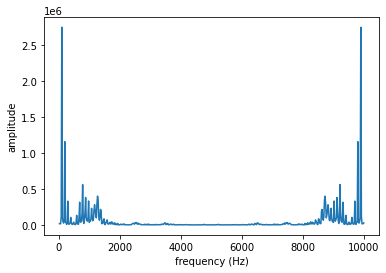

In [ ]:
#플라팅
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp) #512개의 x값. 제일 첫:10000/512 마지막:10000-각각의 amp값이 y축
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

10000은 사람이 못 듣지 않니? 
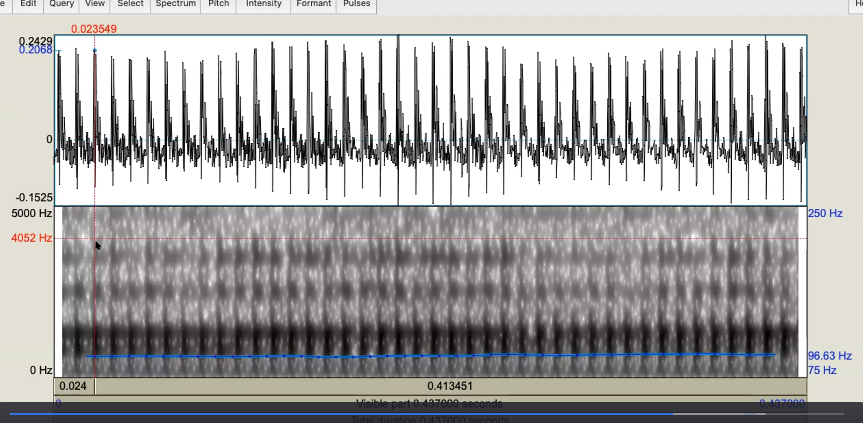

저기서 한 슬라이스가 스펙트럼, 진한 부분은 닷프 결과 높은 것, 연한 건 값이 낮은 거

사람이 여러 성분의 소리 만들어냄. 이건 기본 주파수(120헤르쯔)이랑 다른겨

그리고 사람이 듣는 거랑 말하는 거랑 또 다르고

그리고 sr 10000인데 저긴 5000헤르쯔까지만 표시. 왜냠ㄴ 아까 본 그래프에서도 반 기준으로 좌우 똑같!!! 그래서 필요 없는겨-> 5000까지만 의미가 있다. 

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

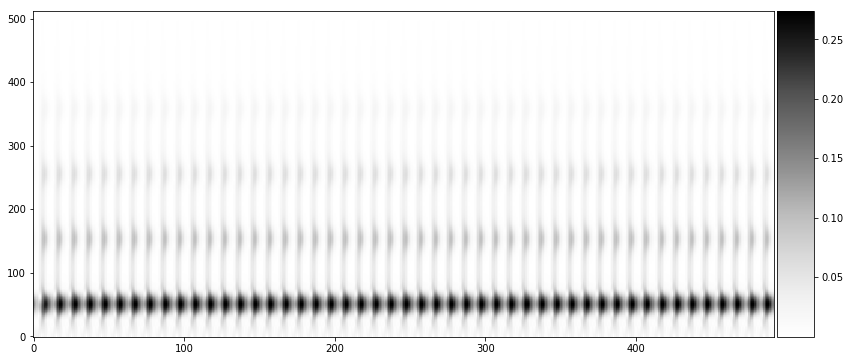

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

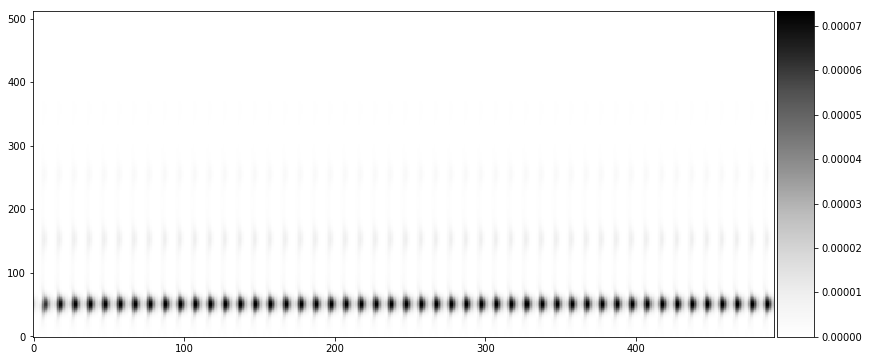

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

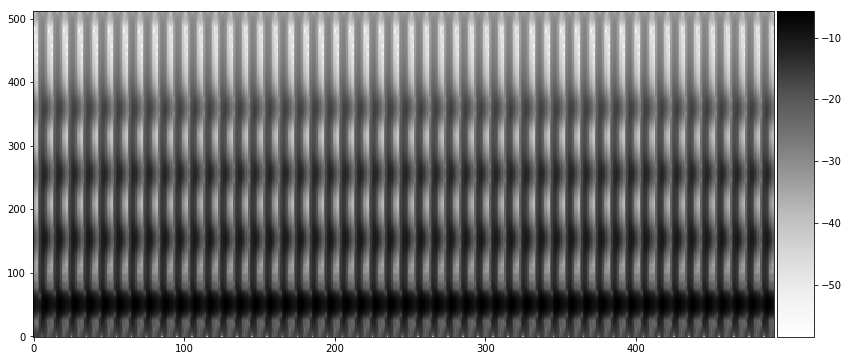

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

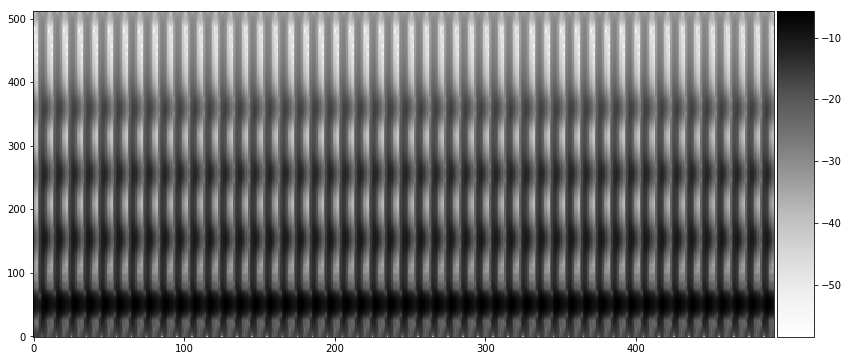

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);